In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import pickle

# Load the dataset
data = pd.read_csv('new.csv')

# Extract the required features
df = data[['age', 'height', 'weight', 'size']]

# Process the features
x = df.iloc[:, :3]
y = df.iloc[:, 3]

# Initialize the Random Forest model
random_forest = RandomForestRegressor()

# Train the Random Forest model
random_forest.fit(x, y)

# Save the model in the current directory using pickle
pickle.dump(random_forest, open('model.pkl','wb'))

In [5]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Define test size
test_size = 0.2

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

# Make predictions
y_pred = random_forest.predict(x_test)

# Calculate mean squared error (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (accuracy)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MSE: 0.6735525000000001
R-squared: 0.8190542392005158


In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pickle

# Load the dataset
data = pd.read_csv('s.csv')

# Extract the required features
df = data[['age', 'height', 'weight', 'size', 'size_label']]

# Process the features
x = df.iloc[:, :4]

# Label encode the target variable 'size_label'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['size_label'])

# One-hot encode the categorical variable 'size_label'
encoder = OneHotEncoder(sparse=False, drop='first')
size_label_encoded = encoder.fit_transform(df[['size_label']])
size_label_encoded_df = pd.DataFrame(size_label_encoded, columns=encoder.get_feature_names_out(['size_label']))

# Concatenate the encoded features with the original features
x = pd.concat([x, size_label_encoded_df], axis=1)

# Initialize the Random Forest model
random_forest = RandomForestRegressor()

# Train the Random Forest model
random_forest.fit(x, y)

# Save the model in the current directory using pickle
pickle.dump(random_forest, open('model.pkl', 'wb'))


c:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load the dataset
data = pd.read_csv('s.csv')

# Extract the required features
df = data[['age', 'height', 'weight', 'size', 'size_label']]

# Process the features
x = df.iloc[:, :4]

# Label encode the target variable 'size_label'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['size_label'])

# One-hot encode the categorical variable 'size_label'
encoder = OneHotEncoder(sparse=False, drop='first')
size_label_encoded = encoder.fit_transform(df[['size_label']])
size_label_encoded_df = pd.DataFrame(size_label_encoded, columns=encoder.get_feature_names_out(['size_label']))

# Concatenate the encoded features with the original features
x = pd.concat([x, size_label_encoded_df], axis=1)

# Split data into training and testing sets
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

# Initialize the Random Forest model
random_forest = RandomForestRegressor()

# Train the Random Forest model
random_forest.fit(x_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(x_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (accuracy)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(random_forest, x, y, cv=5, scoring='neg_mean_squared_error')

# Display the cross-validation scores
print("Cross-Validation Scores:", -cv_scores)
print("Mean MSE:", -np.mean(cv_scores))


c:\Users\navee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


MSE: 0.0
R-squared: 1.0
Cross-Validation Scores: [0. 0. 0. 0. 0.]
Mean MSE: -0.0


In [2]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Define test size
test_size = 0.2

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

# Make predictions
y_pred = random_forest.predict(x_test)

# Calculate mean squared error (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (accuracy)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MSE: 5.539728087882358
R-squared: 0.7633524132411529


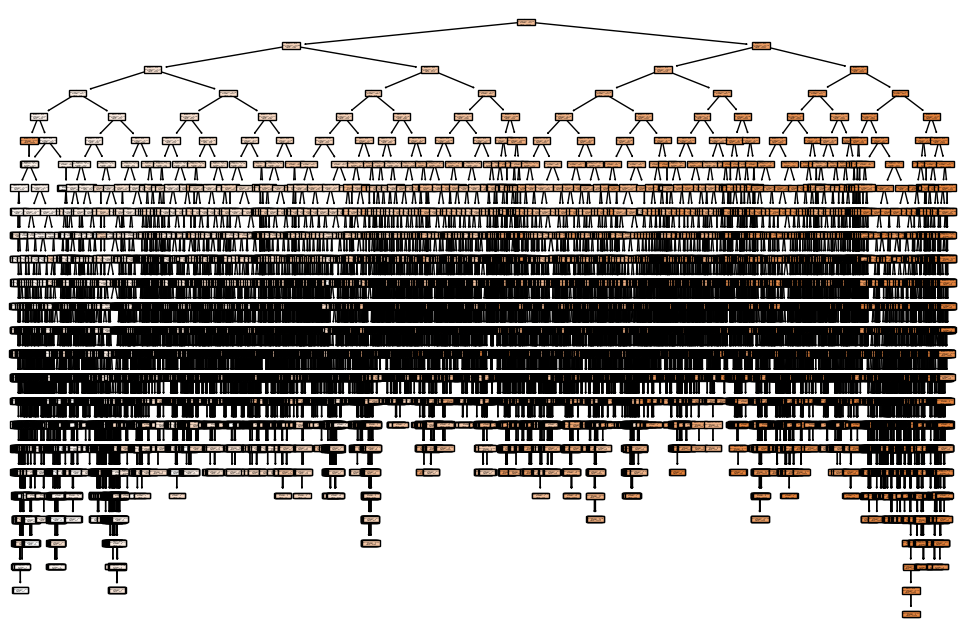

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pickle

# Load the trained Random Forest model
random_forest = pickle.load(open('model.pkl', 'rb'))

# Access the first decision tree in the ensemble
first_tree = random_forest.estimators_[0]

# Visualize the first tree
plt.figure(figsize=(12, 8))
plot_tree(first_tree, filled=True, feature_names=['age', 'height', 'weight'])
plt.show()
